In [38]:
import math
import drawSvg as draw
import IPython.display

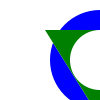

In [33]:
svgText = '''
<svg viewBox = "0 40 100 100">
  <filter id="add-blur-filter">
    <feGaussianBlur stdDeviation="2" />
    <feMerge>
      <feMergeNode />
      <feMergeNode in="SourceGraphic"/>
    </feMerge>
  </filter>
  <clipPath id="triangle-clip">
    <path d="M0,0 L200,0 L200,200 L0,200 M45,70 L100,158 L155,70 Z" />
  </clipPath>
  <mask id="triangle-mask">
    <rect id="bg" x="0" y="0" width="100%" height="100%" fill="white" />
    <path d="M50,70 L150,70 L100,160 Z" fill="black" />
  </mask>
  
  <g class="alchemy-circle">
    <circle cx="100" cy="100" r="50" clip-path="url(#triangle-clip)" fill="blue" />
    <path d="M45,70 L155,70 L100,158 Z M130,100 a30,30 0 1,0 -60,0 a30,30 0 1,0 60,0" fill="green"/>
  </g>
</svg>
'''
IPython.display.SVG(svgText)

In [34]:
import drawSvg as draw

d = draw.Drawing(200, 100, origin='center', displayInline=False)

hex = draw.Path()
d.append(hex)

d.append(draw.Circle(cx=0, cy=0, r=49, fill="none", stroke="black"))
d

In [59]:
def regular_point(i, N, radius):
    x = int(radius * math.cos(math.tau * i / N))
    y = int(radius * math.sin(math.tau * i / N))
    return (x, y)
def regular_poly(N, radius):
    return [regular_point(i, N, radius) for i in range(N)]
regular_poly(6, 49)

[(49, 0), (24, 42), (-24, 42), (-49, 0), (-24, -42), (24, -42)]

In [114]:
def points_to_path(points, **kwargs):
    path = draw.Path(**kwargs)
    for i, point in enumerate(points):
        if i == 0:
            path.M(*point)
        else:
            path.L(*point)
    path.Z()
    return path
p = points_to_path(regular_poly(6, 49))
p.args

{'d': 'M49,0 L24,-42 L-24,-42 L-49,0 L-24,42 L24,42 Z'}

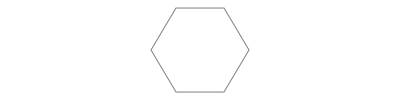

In [112]:
d = draw.Drawing(400, 100, origin='center', fill='none', stroke='gray')
d.append(p)
d

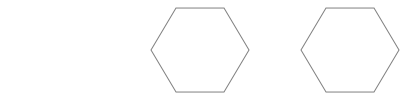

In [113]:
p2 = draw.Group(transform="translate(150,0)")
p2.append(p)
d.append(p2)
d

https://codepen.io/myhf/pen/MVMQPZ

In [ ]:
from bokeh.util.hex import hexbin